What is Restaurant Analytics?
Restaurant analytics are numbers or ratios in the form of key performance indicators (KPIs) that provide insights into the core processes of the restaurant business. These metrics or analytics include data insights that restaurant owners can use for making improvements in their business or making investment decisions.

### Introduction
Yelp is a platform over which users discover and share information about local businesses through reviews. Reviewers write about their experiences and rate businesses from 1 to 5 stars, with 5 being the most positive. Yelp features a multitude of business categories including Beauty & Spas, Restaurants, Shopping, Real Estate, etc.

The available data includes five (5) independent datasets, including information on businesses, store check-in durations, user review summaries, tips from users, and info on registered users.
For the analyses reported, I chose to work exclusively with the datasets that described businesses and reviews.

### Filtering Yelp Review Data for Topic Modellling
To filter Yelp reviews based on geographic regions like Northern Virginia and Washington, D.C., we utilize the postal code (zip code) column in the dataset. Northern Virginia and D.C. have specific zip code ranges that can be used to identify businesses located in these areas.

#### Data Preprocessing
The Yelp dataset is around 8 GB of data. This would take too long to process and train so we filtered the dataset by restaurants. To do this we looked at the business json that contained the IDs of all businesses and indexed the ones that were classified as restaurants. This reduced our dataset to around 3 GB which was much more manageable.

We extracted data from the ‘review’ and ‘business’ primary tables. We joined together the ‘review’ and ‘business’ tables to associate geographic location with the ‘review’ table.

In [99]:
import pandas as pd
restaurant_df = pd.read_csv("restaurant_df.csv")


In [100]:
restaurant_df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,cleaned_text,sentiment
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...",wow yummy different delicious favorite lamb cu...,1.0
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...",cute interior owner gave us tour upcoming pati...,1.0
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30...",long term frequent customer establishment went...,0.0
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Fries Rebellion,...,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ""'casual'"", 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2...",amazingly amazing wings homemade bleu cheese r...,1.0
4,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,Milktooth,...,39.759169,-86.146494,4.0,1379,1,"{'GoodForKids': 'True', 'Alcohol': ""u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',...",locals recommended milktooth amazing jewel ind...,1.0


In [103]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
restaurant_df['date'] = pd.to_datetime(restaurant_df['date'])  # Convert the 'date' column to datetime format
latest_date = restaurant_df['date'].max()  # Get the latest date

print("The latest date in the dataset is:", latest_date)

The latest date in the dataset is: 2022-01-19 19:48:25


In [105]:
restaurant_df['date'] = pd.to_datetime(restaurant_df['date'])  # Convert the 'date' column to datetime format
oldest_date = restaurant_df['date'].min()  # Get the oldest date

print("The oldest date in the dataset is:", oldest_date)

The oldest date in the dataset is: 2005-02-16 03:23:22


Lets filter our data to get reviews for the last 5 years as it would be more relevant for the business and also reduce the size of our dataset for further analysis.

In [127]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming your dataset is stored in a DataFrame called 'df'
restaurant_df['date'] = pd.to_datetime(restaurant_df['date'])  # Convert the 'date' column to datetime format

# Get today's date
today = datetime.today()

# Calculate the date 5 years ago from today
cutoff_date = today - timedelta(days=365*5)

# Filter the DataFrame to include only reviews from the last 5 years
filtered_df_5_years = restaurant_df[restaurant_df['date'] >= cutoff_date]

print("Filtered data for the last 5 years:")
print(filtered_df_5_years)


Filtered data for the last 5 years:
                      review_id                 user_id  \
154508   jA1JQhMMgAjS6KPUmeYUwg  xIqVxrEoHRx2eMeIC4HIEQ   
154513   0MwFRkSZShRfeBFWN1YzsQ  qkmzH5oT1V8_1GpBc3_7zw   
155694   U8_ehvGLQzTK9drgHKObbA  OozcBexcgIKztqL49n8KxQ   
156329   KBBl_3h9xJ82kIAgdYtMCA  PEvrhKgW923jPcoB48MQAg   
157513   CE-CblTswQgRnoWSlMmJ4g  _7NoTSc5pyW8MzKNR0VKTQ   
...                         ...                     ...   
4181547  A5uNiAOGcU0M34sSGN6Wkg  JWhZs-vSggwN6WgxBHgIDw   
4181549  1ryZLb9pSBz0y66tHB-rfw  XJTO9x78TgWE94cmXqNduA   
4181553  PVRvzY0NxSU-fiK3JOXX7w  cTozFTTWjlFYc3yusdbZmA   
4181555  wD5ZWao_vjyT2h4xmGam8Q  7L7GL5Pi2cf8mbm2Dpw4zw   
4181557  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                    business_id  stars_x  useful  funny  cool  \
154508   c-IgS6Pk6vMyax7Rbr38eA        1       0      0     0   
154513   tVxL-Ygzwp8NMuxwvNmWRA        2       0      0     0   
155694   _k8qEyZjGsGaCAtN_5EYSw        5       0      0     

In [125]:
filtered_df_5_years.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,cleaned_text,sentiment
154508,jA1JQhMMgAjS6KPUmeYUwg,xIqVxrEoHRx2eMeIC4HIEQ,c-IgS6Pk6vMyax7Rbr38eA,1,0,0,0,We have waited for months to try this place an...,2019-10-01 23:16:46,Barbecue and Bourbon,...,39.785425,-86.241454,4.0,284,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","American (New), Restaurants, Cocktail Bars, Ba...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",waited months try place disappointing say leas...,0.0
154513,0MwFRkSZShRfeBFWN1YzsQ,qkmzH5oT1V8_1GpBc3_7zw,tVxL-Ygzwp8NMuxwvNmWRA,2,0,0,0,"Steak tacos were good but I found bones, yes m...",2019-11-11 23:13:16,Los Potrillos,...,40.012376,-75.112463,4.0,17,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Spanish, Restaurants, ...","{'Monday': '10:0-23:30', 'Tuesday': '10:0-23:3...",steak tacos good found bones yes multiple chic...,0.0
155694,U8_ehvGLQzTK9drgHKObbA,OozcBexcgIKztqL49n8KxQ,_k8qEyZjGsGaCAtN_5EYSw,5,0,0,0,"Clean, staff was friendly and fast,whoever mad...",2019-09-30 16:14:24,Tropical Smoothie Cafe,...,28.186591,-82.424543,3.5,13,1,"{'RestaurantsDelivery': 'True', 'BusinessAccep...","Restaurants, Food, Sandwiches, Juice Bars & Sm...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-21:0', '...",clean staff friendly fastwhoever made wrap mad...,1.0
156329,KBBl_3h9xJ82kIAgdYtMCA,PEvrhKgW923jPcoB48MQAg,wJmyu7W1K9A_gE8Ed4Bc9w,5,0,0,0,Had shrimp tacos today which was awesome and A...,2019-10-19 19:08:30,Trident Grill,...,32.236334,-110.941738,4.0,370,1,"{'BikeParking': 'True', 'GoodForKids': 'False'...","Bars, Seafood, Sports Bars, American (Traditio...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",shrimp tacos today awesome ashleigh served eve...,1.0
157513,CE-CblTswQgRnoWSlMmJ4g,_7NoTSc5pyW8MzKNR0VKTQ,NLugmrrjRqw8jQGvard-eA,5,1,0,1,"Just had the best roasted turkey sandwich, ser...",2019-10-04 23:15:49,Certified Kitchen + Bakery,...,43.629822,-116.203449,4.5,93,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Food, Breakfast & Brunch, American (New), Bake...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-16:0', '...",best roasted turkey sandwich served side au ju...,1.0


In [211]:
# List of columns to drop
columns_to_drop = ['useful', 'funny', 'cool', 'text', 'hours', 'is_open', 'hours','attributes','address']

# Drop the columns
restaurant_df_cleaned = filtered_df_5_years.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
restaurant_df_cleaned.head()

,review_id,user_id,business_id,stars_x,date,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,cleaned_text,sentiment
154508,jA1JQhMMgAjS6KPUmeYUwg,xIqVxrEoHRx2eMeIC4HIEQ,c-IgS6Pk6vMyax7Rbr38eA,1,2019-10-01 23:16:46,Barbecue and Bourbon,Speedway,IN,46224,39.785425,-86.241454,4.0,284,"American (New), Restaurants, Cocktail Bars, Ba...",waited months try place disappointing say leas...,0.0
154513,0MwFRkSZShRfeBFWN1YzsQ,qkmzH5oT1V8_1GpBc3_7zw,tVxL-Ygzwp8NMuxwvNmWRA,2,2019-11-11 23:13:16,Los Potrillos,Philadelphia,PA,19124,40.012376,-75.112463,4.0,17,"American (Traditional), Spanish, Restaurants, ...",steak tacos good found bones yes multiple chic...,0.0
155694,U8_ehvGLQzTK9drgHKObbA,OozcBexcgIKztqL49n8KxQ,_k8qEyZjGsGaCAtN_5EYSw,5,2019-09-30 16:14:24,Tropical Smoothie Cafe,Lutz,FL,33559,28.186591,-82.424543,3.5,13,"Restaurants, Food, Sandwiches, Juice Bars & Sm...",clean staff friendly fastwhoever made wrap mad...,1.0
156329,KBBl_3h9xJ82kIAgdYtMCA,PEvrhKgW923jPcoB48MQAg,wJmyu7W1K9A_gE8Ed4Bc9w,5,2019-10-19 19:08:30,Trident Grill,Tucson,AZ,85719,32.236334,-110.941738,4.0,370,"Bars, Seafood, Sports Bars, American (Traditio...",shrimp tacos today awesome ashleigh served eve...,1.0
157513,CE-CblTswQgRnoWSlMmJ4g,_7NoTSc5pyW8MzKNR0VKTQ,NLugmrrjRqw8jQGvard-eA,5,2019-10-04 23:15:49,Certified Kitchen + Bakery,Boise,ID,83702,43.629822,-116.203449,4.5,93,"Food, Breakfast & Brunch, American (New), Bake...",best roasted turkey sandwich served side au ju...,1.0


In [133]:
duplicate_count = restaurant_df_cleaned['review_id'].duplicated().sum()
print("Number of duplicate review_id entries:", duplicate_count)

Number of duplicate review_id entries: 0


### Text Processing
To prepare the text for training, we used the following steps

1. Convert the string to lowercase — the same word but spelled differently should be converted to lowercase to reduce the number of words in bag of words.
2. Remove numbers — numbers do not usually have as significant impact as words.
3. Remove punctuations — punctuations do not usually have as significant impact as words.
4. Remove leading and trailing whitespaces — reduce dataset size.
5. Remove stop words — stop words are the most common words found in the english language such as “a”, “the”, etc. Rarer words are those that occur with less frequency in the documents and convey more meaning than stop words. Removing stop words reduces both noise and the dataset size. Our preprocessing uses the NLTK stop word dictionary to remove stop words.
6. Lemmatization — to convert a word into its stem word, two common stemming algorithms are used for text processing: Porter stemming and lemmatization. Porter stemming is a simpler and faster word stemming algorithm. It does the conversion by truncating inflections in the word to get to the stem. However, Porter stemming does not take into consideration the text’s context and may return an invalid word or a word that changes the meaning of the text. Lemmatization is a more aggressive algorithm that takes into account the text’s context before converting the word. It also uses a dictionary lookup which validates that the transformed word is a valid entry. However, lemmatization takes longer to process.

In [28]:

# Group by 'business_id' and count the number of reviews
business_review_counts = restaurant_df.groupby('business_id').size().reset_index(name='review_count')

# Sort by 'review_count' in descending order
top_10_businesses = business_review_counts.sort_values(by='review_count', ascending=False).head(10)

# Display the top 10 businesses
print(top_10_businesses)

                  business_id  review_count
31541  ac1AeYqs8Z4_e2X5M3if2A          6728
30761  _ab50qdWOk0DdB6XOrBitw          6704
14401  GXFMD0Z4jEVZBCsbPf4CTQ          5679
51384  ytynqOUb3hjKeJfRj5Tshw          5474
42708  oBNrLz4EDhiscSlbOl8uAw          4806
30433  _C7QiQQc47AOEv4PE3Kong          4487
26471  VQcCL9PiNL_wkGf-uF3fjg          4419
38031  iSRTaT9WngzB8JJ2YKJUig          4191
14124  GBTPC53ZrG1ZBY3DT8Mbcw          4155
6379   6a4gLLFSgr-Q6CZXDLzBGQ          3991


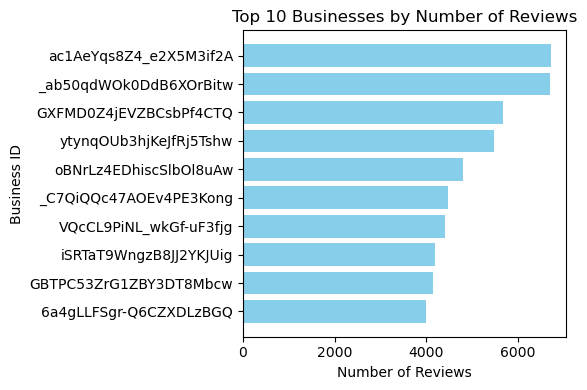

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the top 10 businesses DataFrame 'top_10_businesses'

# Plotting the top 10 businesses
plt.figure(figsize=(6,4))
plt.barh(top_10_businesses['business_id'], top_10_businesses['review_count'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Business ID')
plt.title('Top 10 Businesses by Number of Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest review count on top
plt.tight_layout()

# Show the plot
plt.show()

Step1 : Data Preparation

In [35]:

# List of top business_ids
business_ids = [
    'ac1AeYqs8Z4_e2X5M3if2A', '_ab50qdWOk0DdB6XOrBitw', 'GXFMD0Z4jEVZBCsbPf4CTQ',
    'ytynqOUb3hjKeJfRj5Tshw', 'oBNrLz4EDhiscSlbOl8uAw', '_C7QiQQc47AOEv4PE3Kong',
    'VQcCL9PiNL_wkGf-uF3fjg', 'iSRTaT9WngzB8JJ2YKJUig', 'GBTPC53ZrG1ZBY3DT8Mbcw',
    '6a4gLLFSgr-Q6CZXDLzBGQ'
]

# Filter dataset for the top business_ids
top_business_reviews = restaurant_df[restaurant_df['business_id'].isin(business_ids)]

In [37]:
top_business_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,cleaned_text,sentiment
65,yyrMqY7sNp5gT7KJ1AaYWA,pitYOVSsF8R1gWG1G0qxsA,GBTPC53ZrG1ZBY3DT8Mbcw,4,0,0,0,We have been here twice for brunch and have en...,2016-03-07 17:25:30,Luke,...,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",twice brunch enjoyed immensely everything trie...,1
158,wEfzqOfbwn4Ohe2ZDOLAzw,VMtyZjaEJB9nfmjr4xdVlw,GBTPC53ZrG1ZBY3DT8Mbcw,4,1,1,0,First meal in New Orleans. I had the $15 lunch...,2012-11-06 22:28:18,Luke,...,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",first meal new orleans 15 lunch special seafoo...,1
376,XT_3UpEhO5eJIFxevnv_Yw,0WqEkKMu03irkMiEtsFxZg,GBTPC53ZrG1ZBY3DT8Mbcw,4,0,0,0,Service is excellent. Atmosphere is great. The...,2015-02-02 07:25:28,Luke,...,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",service excellent atmosphere great raw bar fan...,1
527,YpHIixkA2K96wFLbI6FHkQ,tt2qIFKZumubxk_UwXhijA,GBTPC53ZrG1ZBY3DT8Mbcw,5,0,0,0,This was our second choice after finding out R...,2009-03-01 00:24:17,Luke,...,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",second choice finding rio mar closed mardi gra...,1
579,gnEmBGyBs7DOtIXGmJQdKQ,XuadFePn8P6l5epbEFnfKw,GBTPC53ZrG1ZBY3DT8Mbcw,4,0,0,0,Great oyster happy hours that go on from 5-7pm...,2015-08-19 18:35:37,Luke,...,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",great oyster happy hours go 57pm boyfriend sha...,1


In [59]:
print(top_business_reviews['text'].head())

65     We have been here twice for brunch and have en...
158    First meal in New Orleans. I had the $15 lunch...
376    Service is excellent. Atmosphere is great. The...
527    This was our second choice after finding out R...
579    Great oyster happy hours that go on from 5-7pm...
Name: text, dtype: object


Step 2: Text Cleaning

In [49]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if necessary
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation using regex
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply the cleaning function to the 'text' column and create a new 'cleaned_text' column using .loc
top_business_reviews.loc[:, 'cleaned_text'] = top_business_reviews['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 3: Sentiment Analysis 

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER data if needed
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the 'cleaned_text' column
top_business_reviews.loc[:, 'sentiment_score'] = top_business_reviews['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment based on the compound score
top_business_reviews.loc[:, 'sentiment_category'] = top_business_reviews['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
# Display sentiment distribution
sentiment_distribution = top_business_reviews.groupby('business_id')['sentiment_category'].value_counts().unstack(fill_value=0)
print(sentiment_distribution)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment_category      negative  neutral  positive
business_id                                        
6a4gLLFSgr-Q6CZXDLzBGQ       183       19      3789
GBTPC53ZrG1ZBY3DT8Mbcw       140       21      3994
GXFMD0Z4jEVZBCsbPf4CTQ       239       28      5412
VQcCL9PiNL_wkGf-uF3fjg       402       27      3990
_C7QiQQc47AOEv4PE3Kong       139       24      4324
_ab50qdWOk0DdB6XOrBitw       458       79      6167
ac1AeYqs8Z4_e2X5M3if2A       353       29      6346
iSRTaT9WngzB8JJ2YKJUig       630       33      3528
oBNrLz4EDhiscSlbOl8uAw       212       26      4568
ytynqOUb3hjKeJfRj5Tshw       224       86      5164


Step 3: Generate Bigrams, Trigrams, and N-Grams

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def generate_ngrams(text_series, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(text_series)
    ngram_freq = pd.DataFrame(ngram_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
    return ngram_freq.sort_values(by='count', ascending=False).head(10)

# Generate bigrams for each business
for business_id in business_ids:
    business_reviews = top_business_reviews[top_business_reviews['business_id'] == business_id]
    print(f"Top 10 Bigrams for Business ID {business_id}:")
    bigrams = generate_ngrams(business_reviews['cleaned_text'], n=2)
    print(bigrams)

# Similarly, generate trigrams and n-grams by changing `n=2` to `n=3` or more

Top 10 Bigrams for Business ID ac1AeYqs8Z4_e2X5M3if2A:
                count
new orleans      1946
crab cakes       1112
oceana grill      462
taste new         461
great food        461
red beans         459
beans rice        434
food great        402
great service     381
french quarter    380
Top 10 Bigrams for Business ID _ab50qdWOk0DdB6XOrBitw:
                     count
chargrilled oysters   2629
new orleans           1838
raw oysters           1090
po boy                 782
grilled oysters        752
charbroiled oysters    750
worth wait             588
oyster house           529
acme oyster            500
red beans              465
Top 10 Bigrams for Business ID GXFMD0Z4jEVZBCsbPf4CTQ:
                count
hot chicken      2880
mac cheese       2174
hattie bs        2082
fried chicken    1411
pimento mac       753
damn hot          684
potato salad      680
worth wait        670
banana pudding    560
shut cluck        442
Top 10 Bigrams for Business ID ytynqOUb3hjKeJfRj5Tshw:

In [68]:
python
Copy code
# Correct import for triu
from scipy import triu  # Import from scipy

# Alternatively from numpy
import numpy as np
upper_triangle = np.triu(matrix)  # Example for upper triangular matrix
import gensim
from gensim import corpora

# Function to apply LDA topic modeling
def topic_modeling(text_series, num_topics=5):
    # Preprocess the text
    processed_docs = [gensim.utils.simple_preprocess(doc) for doc in text_series]
    
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary(processed_docs)
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    
    # Apply LDA
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    
    # Display the topics
    for idx, topic in lda_model.print_topics(num_words=5):
        print(f"Topic {idx}: {topic}")

# Apply LDA for each business
for business_id in business_ids:
    business_reviews = top_business_reviews[top_business_reviews['business_id'] == business_id]
    print(f"Topics for Business ID {business_id}:")
    topic_modeling(business_reviews['cleaned_text'])

SyntaxError: invalid syntax (2294135517.py, line 2)

In [72]:
# Sentiment KPI: Percentage of positive reviews
sentiment_kpi = top_business_reviews.groupby('business_id')['sentiment_category'].value_counts(normalize=True).unstack(fill_value=0) * 100
print(sentiment_kpi)


sentiment_category       negative   neutral   positive
business_id                                           
6a4gLLFSgr-Q6CZXDLzBGQ   4.585317  0.476071  94.938612
GBTPC53ZrG1ZBY3DT8Mbcw   3.369434  0.505415  96.125150
GXFMD0Z4jEVZBCsbPf4CTQ   4.208487  0.493045  95.298468
VQcCL9PiNL_wkGf-uF3fjg   9.097081  0.610998  90.291921
_C7QiQQc47AOEv4PE3Kong   3.097838  0.534879  96.367283
_ab50qdWOk0DdB6XOrBitw   6.831742  1.178401  91.989857
ac1AeYqs8Z4_e2X5M3if2A   5.246730  0.431034  94.322235
iSRTaT9WngzB8JJ2YKJUig  15.032212  0.787402  84.180387
oBNrLz4EDhiscSlbOl8uAw   4.411153  0.540990  95.047857
ytynqOUb3hjKeJfRj5Tshw   4.092072  1.571063  94.336865


In [11]:
restaurant_df['state']

0          PA
1          LA
2          PA
3          PA
4          IN
           ..
4181553    NV
4181554    MO
4181555    PA
4181556    NJ
4181557    IN
Name: state, Length: 4181558, dtype: object

Check data set for positive and negative reviews Class Imbalance :

In [74]:
# Count positive and negative sentiments
sentiment_counts = top_business_reviews['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
positive    47282
negative     2980
neutral       372
Name: count, dtype: int64


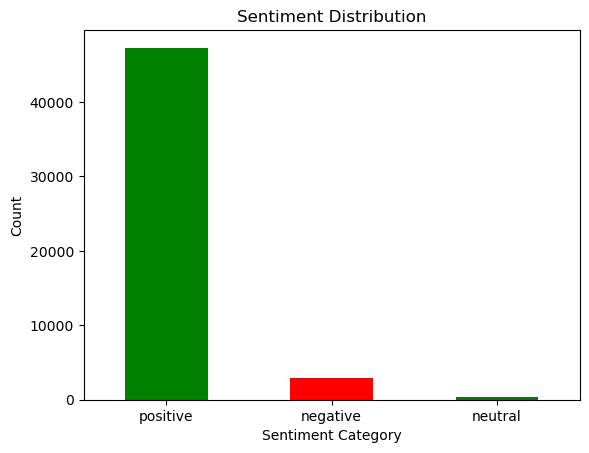

In [77]:
import matplotlib.pyplot as plt

# Plotting the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Clearly, the dataset is unbalanced with many more positive than negative reviews.

In [79]:
# Calculate the imbalance ratio
positive_count = sentiment_counts.get('positive', 0)
negative_count = sentiment_counts.get('negative', 0)

imbalance_ratio = positive_count / negative_count if negative_count > 0 else float('inf')
print(f"Imbalance Ratio (Positive to Negative): {imbalance_ratio:.2f}")

Imbalance Ratio (Positive to Negative): 15.87


Apply SMOTE technique to balance postive and negative sentiments:

In [81]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare your data
# Assuming you have a DataFrame `top_business_reviews`
X = top_business_reviews[['cleaned_text']]  # Features (you may need to encode or vectorize)
y = top_business_reviews['sentiment_category']

# Convert sentiment categories to numerical values
y_encoded = y.map({'positive': 1, 'negative': 0, 'neutral': 2})

# Train-test split (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert text to features (e.g., using TF-IDF or Count Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_vectorized = vectorizer.transform(X_test['cleaned_text'])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

sentiment_category
1    37766
0    37766
2    37766
Name: count, dtype: int64


In [157]:
# Check for NaN values in the DataFrame
nan_counts = restaurant_df_cleaned.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
review_id        0
user_id          0
business_id      0
stars_x          0
date             0
name             0
city             0
state            0
postal_code     12
latitude         0
longitude        0
stars_y          0
review_count     0
categories       0
cleaned_text     2
sentiment        0
dtype: int64


In [213]:
restaurant_df_cleaned1 = restaurant_df_cleaned[restaurant_df_cleaned['cleaned_text'].notna()]

In [215]:
nan_counts = restaurant_df_cleaned1.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
review_id        0
user_id          0
business_id      0
stars_x          0
date             0
name             0
city             0
state            0
postal_code     12
latitude         0
longitude        0
stars_y          0
review_count     0
categories       0
cleaned_text     0
sentiment        0
dtype: int64


In [217]:
restaurant_df_cleaned2 = restaurant_df_cleaned1.dropna(subset=['postal_code'])

In [226]:
restaurant_df_cleaned2.head()

,review_id,user_id,business_id,stars_x,date,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,cleaned_text,sentiment
154508,jA1JQhMMgAjS6KPUmeYUwg,xIqVxrEoHRx2eMeIC4HIEQ,c-IgS6Pk6vMyax7Rbr38eA,1,2019-10-01 23:16:46,Barbecue and Bourbon,Speedway,IN,46224,39.785425,-86.241454,4.0,284,"American (New), Restaurants, Cocktail Bars, Ba...",waited months try place disappointing say leas...,0
154513,0MwFRkSZShRfeBFWN1YzsQ,qkmzH5oT1V8_1GpBc3_7zw,tVxL-Ygzwp8NMuxwvNmWRA,2,2019-11-11 23:13:16,Los Potrillos,Philadelphia,PA,19124,40.012376,-75.112463,4.0,17,"American (Traditional), Spanish, Restaurants, ...",steak tacos good found bones yes multiple chic...,0
155694,U8_ehvGLQzTK9drgHKObbA,OozcBexcgIKztqL49n8KxQ,_k8qEyZjGsGaCAtN_5EYSw,5,2019-09-30 16:14:24,Tropical Smoothie Cafe,Lutz,FL,33559,28.186591,-82.424543,3.5,13,"Restaurants, Food, Sandwiches, Juice Bars & Sm...",clean staff friendly fastwhoever made wrap mad...,1
156329,KBBl_3h9xJ82kIAgdYtMCA,PEvrhKgW923jPcoB48MQAg,wJmyu7W1K9A_gE8Ed4Bc9w,5,2019-10-19 19:08:30,Trident Grill,Tucson,AZ,85719,32.236334,-110.941738,4.0,370,"Bars, Seafood, Sports Bars, American (Traditio...",shrimp tacos today awesome ashleigh served eve...,1
157513,CE-CblTswQgRnoWSlMmJ4g,_7NoTSc5pyW8MzKNR0VKTQ,NLugmrrjRqw8jQGvard-eA,5,2019-10-04 23:15:49,Certified Kitchen + Bakery,Boise,ID,83702,43.629822,-116.203449,4.5,93,"Food, Breakfast & Brunch, American (New), Bake...",best roasted turkey sandwich served side au ju...,1


In [227]:
# Export the DataFrame to a CSV file
restaurant_df_cleaned2.to_csv('restaurant_reviews_cleaned.csv', index=False)

print("DataFrame has been exported to 'restaurant_reviews_cleaned.csv'.")

DataFrame has been exported to 'restaurant_reviews_cleaned.csv'.


In [ ]:
# 1. Distribution of Star Ratings
plt.figure(figsize=(6,4))
sns.countplot(x='stars_x', data=restaurant_df_cleaned2, palette='coolwarm')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

In [223]:
nan_counts = restaurant_df_cleaned2.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
review_id       0
user_id         0
business_id     0
stars_x         0
date            0
name            0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_y         0
review_count    0
categories      0
cleaned_text    0
sentiment       0
dtype: int64


In [225]:

# Define the target variable (sentiment) based on stars
restaurant_df_cleaned2['sentiment'] = restaurant_df_cleaned2['stars_x'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))

# Drop neutral reviews
restaurant_df_cleaned2 = restaurant_df_cleaned2.dropna(subset=['sentiment'])

# Split the data into training and testing sets
X = restaurant_df_cleaned2['cleaned_text']
y = restaurant_df_cleaned2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

### Step 3: Extract n-grams (bigrams and trigrams) as potential KPIs

# Vectorizer for n-grams (for 1-grams, 2-grams, and 3-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000)
X_ngrams = ngram_vectorizer.fit_transform(restaurant_df_cleaned2['cleaned_text'])

# Get n-grams for positive reviews
positive_reviews = restaurant_df_cleaned2[restaurant_df_cleaned2['sentiment'] == 1]['cleaned_text']
positive_ngrams = ngram_vectorizer.fit_transform(positive_reviews)

# Get n-grams for negative reviews
negative_reviews = restaurant_df_cleaned2[restaurant_df_cleaned2['sentiment'] == 0]['cleaned_text']
negative_ngrams = ngram_vectorizer.fit_transform(negative_reviews)

# Get feature names (n-grams)
positive_ngram_features = ngram_vectorizer.get_feature_names_out()
negative_ngram_features = ngram_vectorizer.get_feature_names_out()

# Calculate frequencies for positive n-grams
positive_ngram_freq = positive_ngrams.toarray().sum(axis=0)
positive_ngrams_df = pd.DataFrame({'ngram': positive_ngram_features, 'frequency': positive_ngram_freq})
positive_ngrams_df = positive_ngrams_df.sort_values(by='frequency', ascending=False).head(20)

# Calculate frequencies for negative n-grams
negative_ngram_freq = negative_ngrams.toarray().sum(axis=0)
negative_ngrams_df = pd.DataFrame({'ngram': negative_ngram_features, 'frequency': negative_ngram_freq})
negative_ngrams_df = negative_ngrams_df.sort_values(by='frequency', ascending=False).head(20)

# Display top n-grams for positive and negative reviews
print("\nTop 20 n-grams for Positive Reviews:")
print(positive_ngrams_df)

print("\nTop 20 n-grams for Negative Reviews:")
print(negative_ngrams_df)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41749
           1       0.97      0.98      0.98    128590

    accuracy                           0.97    170339
   macro avg       0.96      0.95      0.95    170339
weighted avg       0.96      0.97      0.96    170339


Top 20 n-grams for Positive Reviews:
                ngram  frequency
328           friends     409138
393            highly     343216
386            havent     322917
666          properly     268164
783               sit     197544
217               dog     184832
60            average     159608
893        took order     158432
82               bell     139644
32             amount     139148
24              ahead     138229
610             paper     132340
502           manager     129874
380             hands     128979
141  chicken sandwich     126216
708            review     126174
622            person     123066
211     disappointing     122420
370     

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     41749
           1       0.97      0.98      0.98    128590

    accuracy                           0.97    170339
   macro avg       0.96      0.95      0.95    170339
weighted avg       0.96      0.97      0.96    170339


Top 20 n-grams for Positive Reviews (KPIs):
                ngram  frequency
328           friends     409138
393            highly     343216
386            havent     322917
666          properly     268164
783               sit     197544
217               dog     184832
60            average     159608
893        took order     158432
82               bell     139644
32             amount     139148
24              ahead     138229
610             paper     132340
502           manager     129874
380             hands     128979
141  chicken sandwich     126216
708            review     126174
622            person     123066
211     disappointing     122420
3

C:\Users\rashm\AppData\Local\Temp\ipykernel_21084\3098965436.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=positive_ngrams_df, palette='Blues_d')


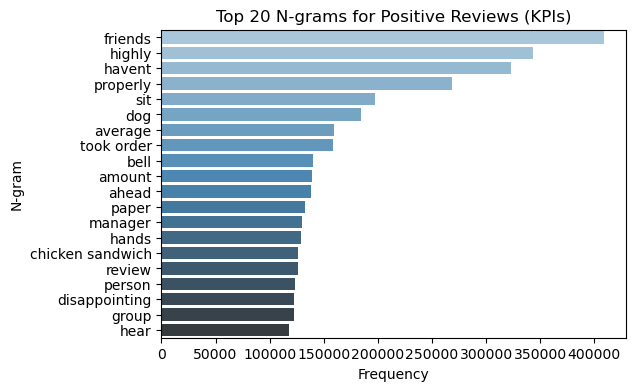

C:\Users\rashm\AppData\Local\Temp\ipykernel_21084\3098965436.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=negative_ngrams_df, palette='Reds_d')


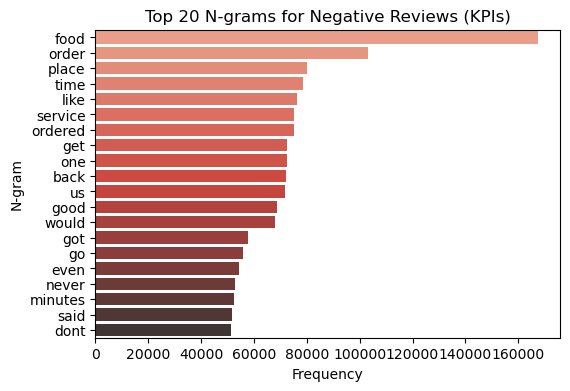

In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the target variable (sentiment) based on stars
restaurant_df_cleaned2['sentiment'] = restaurant_df_cleaned2['stars_x'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))

# Drop neutral reviews
restaurant_df_cleaned2 = restaurant_df_cleaned2.dropna(subset=['sentiment'])

# Split the data into training and testing sets
X = restaurant_df_cleaned2['cleaned_text']
y = restaurant_df_cleaned2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

### Step 3: Extract n-grams (bigrams and trigrams) as potential KPIs

# Vectorizer for n-grams (for 1-grams, 2-grams, and 3-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000)
X_ngrams = ngram_vectorizer.fit_transform(restaurant_df_cleaned2['cleaned_text'])

# Get n-grams for positive reviews
positive_reviews = restaurant_df_cleaned2[restaurant_df_cleaned2['sentiment'] == 1]['cleaned_text']
positive_ngrams = ngram_vectorizer.fit_transform(positive_reviews)

# Get n-grams for negative reviews
negative_reviews = restaurant_df_cleaned2[restaurant_df_cleaned2['sentiment'] == 0]['cleaned_text']
negative_ngrams = ngram_vectorizer.fit_transform(negative_reviews)

# Get feature names (n-grams)
positive_ngram_features = ngram_vectorizer.get_feature_names_out()
negative_ngram_features = ngram_vectorizer.get_feature_names_out()

# Calculate frequencies for positive n-grams
positive_ngram_freq = positive_ngrams.toarray().sum(axis=0)
positive_ngrams_df = pd.DataFrame({'ngram': positive_ngram_features, 'frequency': positive_ngram_freq})
positive_ngrams_df = positive_ngrams_df.sort_values(by='frequency', ascending=False).head(20)

# Calculate frequencies for negative n-grams
negative_ngram_freq = negative_ngrams.toarray().sum(axis=0)
negative_ngrams_df = pd.DataFrame({'ngram': negative_ngram_features, 'frequency': negative_ngram_freq})
negative_ngrams_df = negative_ngrams_df.sort_values(by='frequency', ascending=False).head(20)

# Display top n-grams for positive and negative reviews
print("\nTop 20 n-grams for Positive Reviews (KPIs):")
print(positive_ngrams_df)

print("\nTop 20 n-grams for Negative Reviews (KPIs):")
print(negative_ngrams_df)

### Visualization of the top n-grams

import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 20 n-grams for positive reviews
plt.figure(figsize=(6,4))
sns.barplot(x='frequency', y='ngram', data=positive_ngrams_df, palette='Blues_d')
plt.title('Top 20 N-grams for Positive Reviews (KPIs)')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.show()

# Plot top 20 n-grams for negative reviews
plt.figure(figsize=(6,4))
sns.barplot(x='frequency', y='ngram', data=negative_ngrams_df, palette='Reds_d')
plt.title('Top 20 N-grams for Negative Reviews (KPIs)')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.show()


In [62]:
%pip install spacy


  Using cached spacy-3.7.6-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp312-cp312-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.5-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.4.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached blis-0.7.11-cp312-cp31

In [68]:
import pandas as pd
import spacy
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Assuming the dataset is loaded into a pandas DataFrame 'df'
# For example: df = pd.read_csv('yelp_reviews.csv')

# Example structure: 'business_id', 'stars_x', 'cleaned_text', 'sentiment'

# Group reviews by business
business_reviews = restaurant_df.groupby('business_id')

# Function to preprocess text: remove stopwords, punctuation
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Preprocess the reviews
df['cleaned_text_processed'] = df['cleaned_text'].apply(preprocess_text)

# Extract insights for each business
business_insights = []

for business_id, group in business_reviews:
    business_name = group['name'].iloc[0]
    total_reviews = len(group)
    
    # Calculate the average rating (stars)
    avg_rating = group['stars_x'].mean()
    
    # Calculate the average sentiment
    avg_sentiment = group['sentiment'].mean()
    
    # Get frequent words
    all_text = ' '.join(group['cleaned_text_processed'].tolist())
    word_counts = Counter(all_text.split())
    common_words = word_counts.most_common(10)
    
    # Prepare for LDA Topic Modeling
    tokenized_reviews = [review.split() for review in group['cleaned_text_processed']]
    
    # Create a dictionary and corpus for LDA
    dictionary = corpora.Dictionary(tokenized_reviews)
    corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]
    
    # Train the LDA model for topic modeling
    lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)
    
    # Get topics from LDA
    topics = lda_model.print_topics(num_topics=3, num_words=5)
    
    # Store insights for the business
    insights = {
        'business_id': business_id,
        'business_name': business_name,
        'total_reviews': total_reviews,
        'avg_rating': avg_rating,
        'avg_sentiment': avg_sentiment,
        'common_words': common_words,
        'topics': topics
    }
    
    business_insights.append(insights)

# Convert insights into a DataFrame for analysis
insights_df = pd.DataFrame(business_insights)

# Display insights for all restaurants
print(insights_df[['business_name', 'avg_rating', 'avg_sentiment', 'common_words', 'topics']])

# Visualize average sentiment per restaurant
plt.figure(figsize=(10,6))
insights_df.plot(kind='barh', x='business_name', y='avg_sentiment', color='skyblue', legend=False)
plt.title('Average Sentiment per Restaurant')
plt.xlabel('Average Sentiment')
plt.show()


TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

N-gram analysis fails to clearly differentiate between positive and negative reviews in terms of Key Performance Indicators (KPIs), let's it is shift to a more sophisticated method like topic modeling. 

Topic modeling works by extracting the dominant themes (or topics) from large sets of text. This is particularly useful when classifying reviews into meaningful topics that capture the sentiment more holistically. 
One effective technique for this is Non-negative Matrix Factorization (NMF), which, unlike n-grams, finds abstract topics that can be used to interpret key insights from the data.